<a href="https://colab.research.google.com/github/avaramahmood/Siddhardhan-ML-Course/blob/main/Linear_Regression_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression:<br>
Y = wX + b<br>
Gradient Descent:<br>
w = w - $\alpha$ * dw<br>
b = b - $\alpha$ * db<br>
dw/db => Learning Rate

In [20]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Simple Linear Regression

In [21]:
class Linear_Regression:
    #initiating the parameters(hyperparameters)
    def __init__(self, learning_rate, no_of_iterations):
      self.learning_rate = learning_rate
      self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
      #no of training examples and no of features
      self.m, self.n = X.shape # no of rows and columns
      #initiating the weight and bias
      self.w = np.zeros(self.n)
      self.b = 0
      self.X = X
      self.Y = Y

      #implementing gradient descent
      for i in range(self.no_of_iterations):
        self.update_weights()

    def update_weights(self):
      Y_prediction = self.predict(self.X)

      #calculate the gradiance
      dw = -(2 * (self.X.T).dot(self.Y - Y_prediction))/self.m
      db = -(2 * np.sum(self.Y - Y_prediction))/self.m

      #updating the weights
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

    def predict(self,X):
      return X.dot(self.w) + self.b

Using Linear Regression model for Prediction

In [22]:
#importing some dependencies
from sklearn.model_selection import train_test_split

In [23]:
#Data Preprocessing
!wget https://raw.githubusercontent.com/avaramahmood/Siddhardhan-ML-Course/refs/heads/main/Datasets/salary_data.csv
salary_data = pd.read_csv('salary_data.csv')

--2025-06-13 16:33:52--  https://raw.githubusercontent.com/avaramahmood/Siddhardhan-ML-Course/refs/heads/main/Datasets/salary_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364 [text/plain]
Saving to: ‘salary_data.csv.3’

salary_data.csv.3   100%[===================>]     364  --.-KB/s    in 0s      

2025-06-13 16:33:52 (4.63 MB/s) - ‘salary_data.csv.3’ saved [364/364]



In [24]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [25]:
salary_data.shape

(30, 2)

In [26]:
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, 1].values

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [38]:
regressor = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

In [43]:
table = np.concatenate((Y_pred.reshape(-1,1), Y_test.reshape(-1,1)), axis=1)
pd.DataFrame(table, columns=['Predicted Salary', 'Actual Salary'])

,Predicted Salary,Actual Salary
0,40832.037655,37731.0
1,123082.280881,122391.0
2,65133.245881,57081.0
3,63263.922171,63218.0
4,115604.986042,116969.0
5,108127.691204,109431.0
6,116539.647897,112635.0
7,64198.584026,55794.0
8,76349.188139,83088.0
9,100650.396365,101302.0


In [44]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9749210084439779

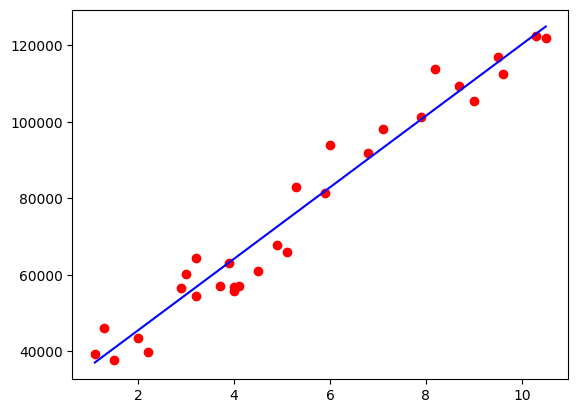

In [46]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')